In [1]:
%matplotlib inline
import pandas as pd
import geopandas

In [2]:
countries = geopandas.read_file('ne_110m_admin_0_countries.shp')
cities = geopandas.read_file('ne_110m_populated_places.shp')
rivers = geopandas.read_file('ne_50m_rivers_lake_centerlines.shp')

### Spatial relationships

How two spatial objects relate to each other:
- within (a, b)
- touches (a, b)
- crosses (a, b)
- overlaps (a, b)
- equals (a, b)
- contains (a, b)
- disjoint (a, b)
- covers (a, b)
- intersects (a, b)

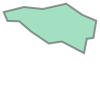

In [9]:
# Relationships between individual objects

belgium = countries.loc[countries['NAME'] == 'Belgium', 'geometry'].squeeze() # using .squeeze() to extract the scalar geometry object from the GeoSeries of length 1
belgium

In [6]:
paris = cities.loc[cities['NAME'] == 'Paris', 'geometry'].squeeze()
brussels = cities.loc[cities['NAME'] == 'Brussels', 'geometry'].squeeze()

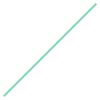

In [10]:
from shapely.geometry import LineString
line = LineString([paris, brussels])
line

<AxesSubplot:>

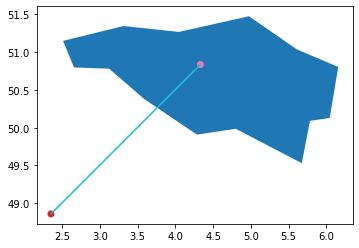

In [8]:
# Visualizing those 4 geometry objects together
geopandas.GeoSeries([belgium, paris, brussels, line]).plot(cmap='tab10')

<AxesSubplot:>

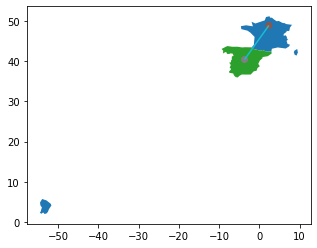

In [12]:
# Producing a similar figure that includes France, Spain, Paris, Madrid
france = countries.loc[countries['NAME'] == 'France', 'geometry'].squeeze()
spain = countries.loc[countries['NAME'] == 'Spain', 'geometry'].squeeze()
paris = cities.loc[cities['NAME'] == 'Paris', 'geometry'].squeeze()
madrid = cities.loc[cities['NAME'] == 'Madrid', 'geometry'].squeeze()
geopandas.GeoSeries([france, spain, paris, madrid, LineString([paris, madrid])]).plot(cmap='tab10')

In [13]:
brussels.within(belgium)

True

In [15]:
belgium.contains(brussels)

True

In [16]:
paris.within(belgium)

False

In [17]:
line.intersects(spain)

True

In [18]:
line.intersects(belgium)

False

In [19]:
spain.contains(line)

False

In [20]:
countries.contains(paris)

0      False
1      False
2      False
3      False
4      False
       ...  
172    False
173    False
174    False
175    False
176    False
Length: 177, dtype: bool

In [21]:
countries[countries.contains(paris)]

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
43,Admin-0 country,1,2,France,FR1,1,2,Country,France,FRA,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3..."


In [23]:
amazon = rivers[rivers['name'] == 'Amazonas'].geometry.squeeze()

In [24]:
countries[countries.crosses(amazon)]

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
29,Admin-0 country,1,2,Brazil,BRA,0,2,Sovereign country,Brazil,BRA,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2..."
31,Admin-0 country,1,2,Peru,PER,0,2,Sovereign country,Peru,PER,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-69.89364 -4.29819, -70.79477 -4.251..."
32,Admin-0 country,1,2,Colombia,COL,0,2,Sovereign country,Colombia,COL,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-66.87633 1.25336, -67.06505 1.13011..."


In [27]:
# Find all the countries touching Croatia
croatia = countries.query('NAME == "Croatia"')['geometry'].squeeze()
countries[countries.touches(croatia)]

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
115,Admin-0 country,1,5,Hungary,HUN,0,2,Sovereign country,Hungary,HUN,...,None,None,None,None,None,None,None,None,None,"POLYGON ((22.08561 48.42226, 22.64082 48.15024..."
150,Admin-0 country,1,6,Slovenia,SVN,0,2,Sovereign country,Slovenia,SVN,...,None,None,None,None,None,None,None,None,None,"POLYGON ((13.80648 46.50931, 14.63247 46.43182..."
170,Admin-0 country,1,5,Bosnia and Herzegovina,BIH,0,2,Sovereign country,Bosnia and Herzegovina,BIH,...,None,None,None,None,None,None,None,None,None,"POLYGON ((18.56000 42.65000, 17.67492 43.02856..."
172,Admin-0 country,1,5,Republic of Serbia,SRB,0,2,Sovereign country,Republic of Serbia,SRB,...,None,None,None,None,None,None,None,None,None,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,Admin-0 country,1,6,Montenegro,MNE,0,2,Sovereign country,Montenegro,MNE,...,None,None,None,None,None,None,None,None,None,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."


### Spatial operation

Methods that return new geometric objects

<AxesSubplot:>

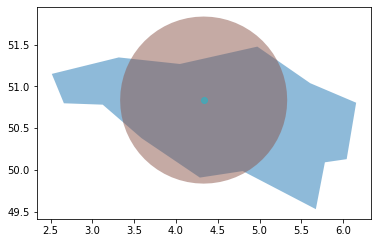

In [28]:
geopandas.GeoSeries([belgium, brussels.buffer(1), brussels]).plot(alpha=0.5, cmap='tab10')

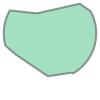

In [29]:
brussels.buffer(1).intersection(belgium)

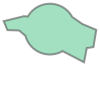

In [30]:
brussels.buffer(1).union(belgium)

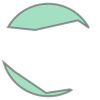

In [31]:
brussels.buffer(1).difference(belgium)

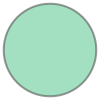

In [38]:
brussels.buffer(1)

<AxesSubplot:>

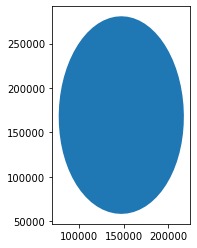

In [37]:
# changing crs from degrees to km distances for the brussels.buffer 
geopandas.GeoSeries(brussels.buffer(1), crs=cities.crs).to_crs(epsg=31370).plot()

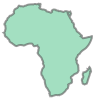

In [40]:
africa_countries = countries[countries['CONTINENT'] == 'Africa']
africa = africa_countries.unary_union
africa

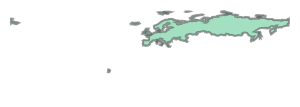

In [41]:
# Create a single polygon of europe
europe_countries = countries[countries['CONTINENT'] == 'Europe']
europe = europe_countries.unary_union
europe

<AxesSubplot:>

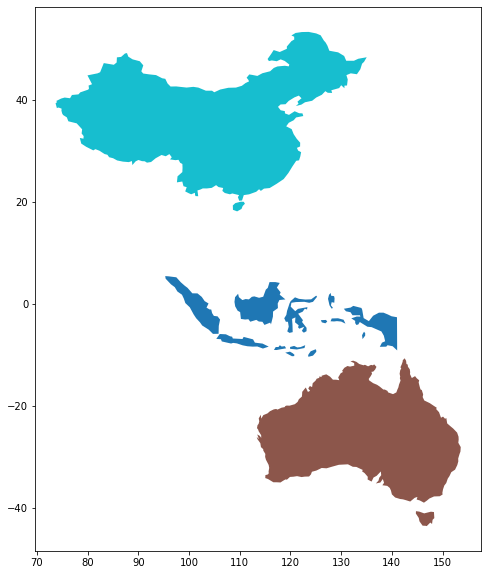

In [58]:
# Create a single polygon with all of the countries that you would have to cross to travel directly from Beijing to Sydney
beijing = cities.loc[cities['NAME'] == 'Beijing', 'geometry'].squeeze()
sydney = cities.loc[cities['NAME'] == 'Sydney', 'geometry'].squeeze()
travel_line = LineString([beijing, sydney])
countries[countries.crosses(travel_line)].plot(cmap='tab10', figsize=(10, 10))